In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

# Scaling
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
import xgboost as xgb

xgboost_version = xgb.__version__

xgboost_version

'2.0.3'

In [4]:
df = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC - 2023/Báo cáo cấp khoa/Data & Label code/Đã label encode/reg_data_(0, 480)_300k.csv")
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,ORIGIN_AIRPORT_ID_LABEL,DEST_AIRPORT_ID_LABEL,ARR_DELAY
0,0.545455,0.300000,1.000000,0.428571,0.167464,0.428571,0.058309,0.024084,0.557951,0.428571,5.0
1,0.545455,0.566667,0.000000,0.285714,0.138756,0.285714,0.104956,0.034939,0.059299,0.097035,1.0
2,0.272727,0.500000,0.833333,0.571429,0.224880,0.571429,0.154519,0.092605,0.827493,0.727763,13.0
3,0.727273,0.233333,0.500000,0.714286,0.110048,0.714286,0.183673,0.110923,0.676550,0.067385,8.0
4,0.818182,0.333333,0.166667,0.428571,0.114833,0.428571,0.516035,0.419946,0.059299,0.005391,1.0
...,...,...,...,...,...,...,...,...,...,...,...
299990,1.000000,0.066667,0.833333,0.428571,0.248804,0.571429,0.221574,0.127205,0.258760,0.487871,14.0
299991,0.090909,0.633333,1.000000,0.857143,0.234450,1.000000,0.559767,0.470149,0.458221,0.495957,2.0
299992,0.727273,0.233333,0.500000,0.285714,0.124402,0.428571,0.425656,0.338195,0.711590,0.495957,5.0
299993,0.545455,0.800000,0.000000,1.000000,0.263158,1.000000,0.221574,0.126526,0.587601,0.059299,13.0


In [5]:
def MAPE(y_pred, y_true):
    # Tính toán giá trị MAPE ban đầu
    mape = np.mean(np.abs((y_true - y_pred) / y_true))

    # Xử lý trường hợp dự đoán là 0
    if np.isinf(mape):
        # Thay thế các dự đoán là 0 bằng một giá trị nhỏ replace_value
        replace_value = 0.00001
        y_true_replaced = np.where(y_true == 0, replace_value, y_true)
        mape = np.mean(np.abs((y_true_replaced - y_pred) / y_true_replaced))

    return mape

def calculate_metrics(Y_pred, y_true):
    metrics = {
        "MAE": mean_absolute_error,
        "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        "R-squared": r2_score,
        "MAPE": MAPE
    }

    results = {'Model': []}
    for metric_name in metrics:
        results[metric_name] = []

    for model_name, y_pred in Y_pred.items():
        results['Model'].append(model_name)
        for metric_name, metric_func in metrics.items():
            results[metric_name].append(metric_func(y_true, y_pred))

    return pd.DataFrame(results)

In [6]:
X = df.drop('ARR_DELAY', axis=1)
y = df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Zero**

In [7]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
xgbrf_model = XGBRFRegressor()
xgbrf_model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [11]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [12]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

## **Validation**

In [13]:
# Danh sách các mô hình và các dự đoán tương ứng
models = [
    ("Decision Tree", dt_model),
    ("Random Forest", rf_model),
    ("XGBoost", xgb_model),
    ("XGBRF", xgbrf_model),
    ("Linear Regression", ln_model),
    ("Support Vector Machine", svm_model),
]

# Dự đoán và lưu kết quả cho tập kiểm tra và tập huấn luyện
Y_pred_test = {}
Y_pred_train = {}
for model_name, model in models:
    Y_pred_test[model_name] = model.predict(X_test)
    Y_pred_train[model_name] = model.predict(X_train)


In [14]:
# Tính toán metrics cho tập kiểm tra
metrics_df = calculate_metrics(Y_pred_test, y_test)

# Tính toán metrics cho tập huấn luyện
metrics_df_train = calculate_metrics(Y_pred_train, y_train)

metrics_df, metrics_df_train

(                    Model        MAE       RMSE  R-squared      MAPE
 0           Decision Tree  13.447107  20.481987   0.669417  1.416054
 1           Random Forest   9.636655  13.977346   0.846048  0.502136
 2                 XGBoost   8.995397  13.394107   0.858628  0.500012
 3                   XGBRF   9.295838  13.818595   0.849525  0.511127
 4       Linear Regression  10.514035  15.162881   0.818824  3.012101
 5  Support Vector Machine   9.071975  14.355972   0.837594  0.741648,
                     Model        MAE       RMSE  R-squared      MAPE
 0           Decision Tree   0.000258   0.045369   0.999998  0.000016
 1           Random Forest   3.598978   5.321366   0.977541  0.217633
 2                 XGBoost   8.721560  13.072123   0.864472  0.479734
 3                   XGBRF   9.348347  14.053175   0.843366  0.513591
 4       Linear Regression  10.568065  15.381630   0.812353  3.493107
 5  Support Vector Machine   9.079375  14.572588   0.831574  0.743342)

In [26]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgbrf_model, f)

In [17]:
# Trích xuất mức độ quan trọng của các biến đầu vào
feature_importances = xgb_model.feature_importances_
variables = ["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "CRS_DEP_TIME", "DEP_DELAY", "CRS_ARR_TIME", "CRS_ELAPSED_TIME", "DISTANCE", "ORIGIN_AIRPORT_ID_LABEL",	"DEST_AIRPORT_ID_LABEL"]

# Tạo DataFrame từ mức độ quan trọng của các biến đầu vào
df_importance = pd.DataFrame({'Variable': variables, 'Importance': feature_importances})

# In DataFrame
df_importance

,Variable,Importance
0,MONTH,0.005119
1,DAY_OF_MONTH,0.004197
2,DAY_OF_WEEK,0.004706
3,CRS_DEP_TIME,0.004401
4,DEP_DELAY,0.956195
5,CRS_ARR_TIME,0.006101
6,CRS_ELAPSED_TIME,0.005192
7,DISTANCE,0.004057
8,ORIGIN_AIRPORT_ID_LABEL,0.004589
9,DEST_AIRPORT_ID_LABEL,0.005443


In [19]:
xgb_pred_test = Y_pred_test["XGBoost"]
xgb_pred_test_df = pd.DataFrame({'Y_pred_test_XGBoost': xgb_pred_test})
xgb_pred_test_df.reset_index(drop=True, inplace=True)

y_test_df = pd.DataFrame({'Y_test': y_test})
y_test_df.reset_index(drop=True, inplace=True)

df_result = pd.concat([y_test_df, xgb_pred_test_df], axis=1)

df_result.reset_index(drop=True, inplace=True)

df_result

,Y_test,Y_pred_test_XGBoost
0,31.0,13.130013
1,4.0,7.380746
2,52.0,35.400497
3,2.0,12.468863
4,1.0,17.133450
...,...,...
59994,29.0,14.160768
59995,4.0,6.984612
59996,29.0,22.389376
59997,9.0,8.683331


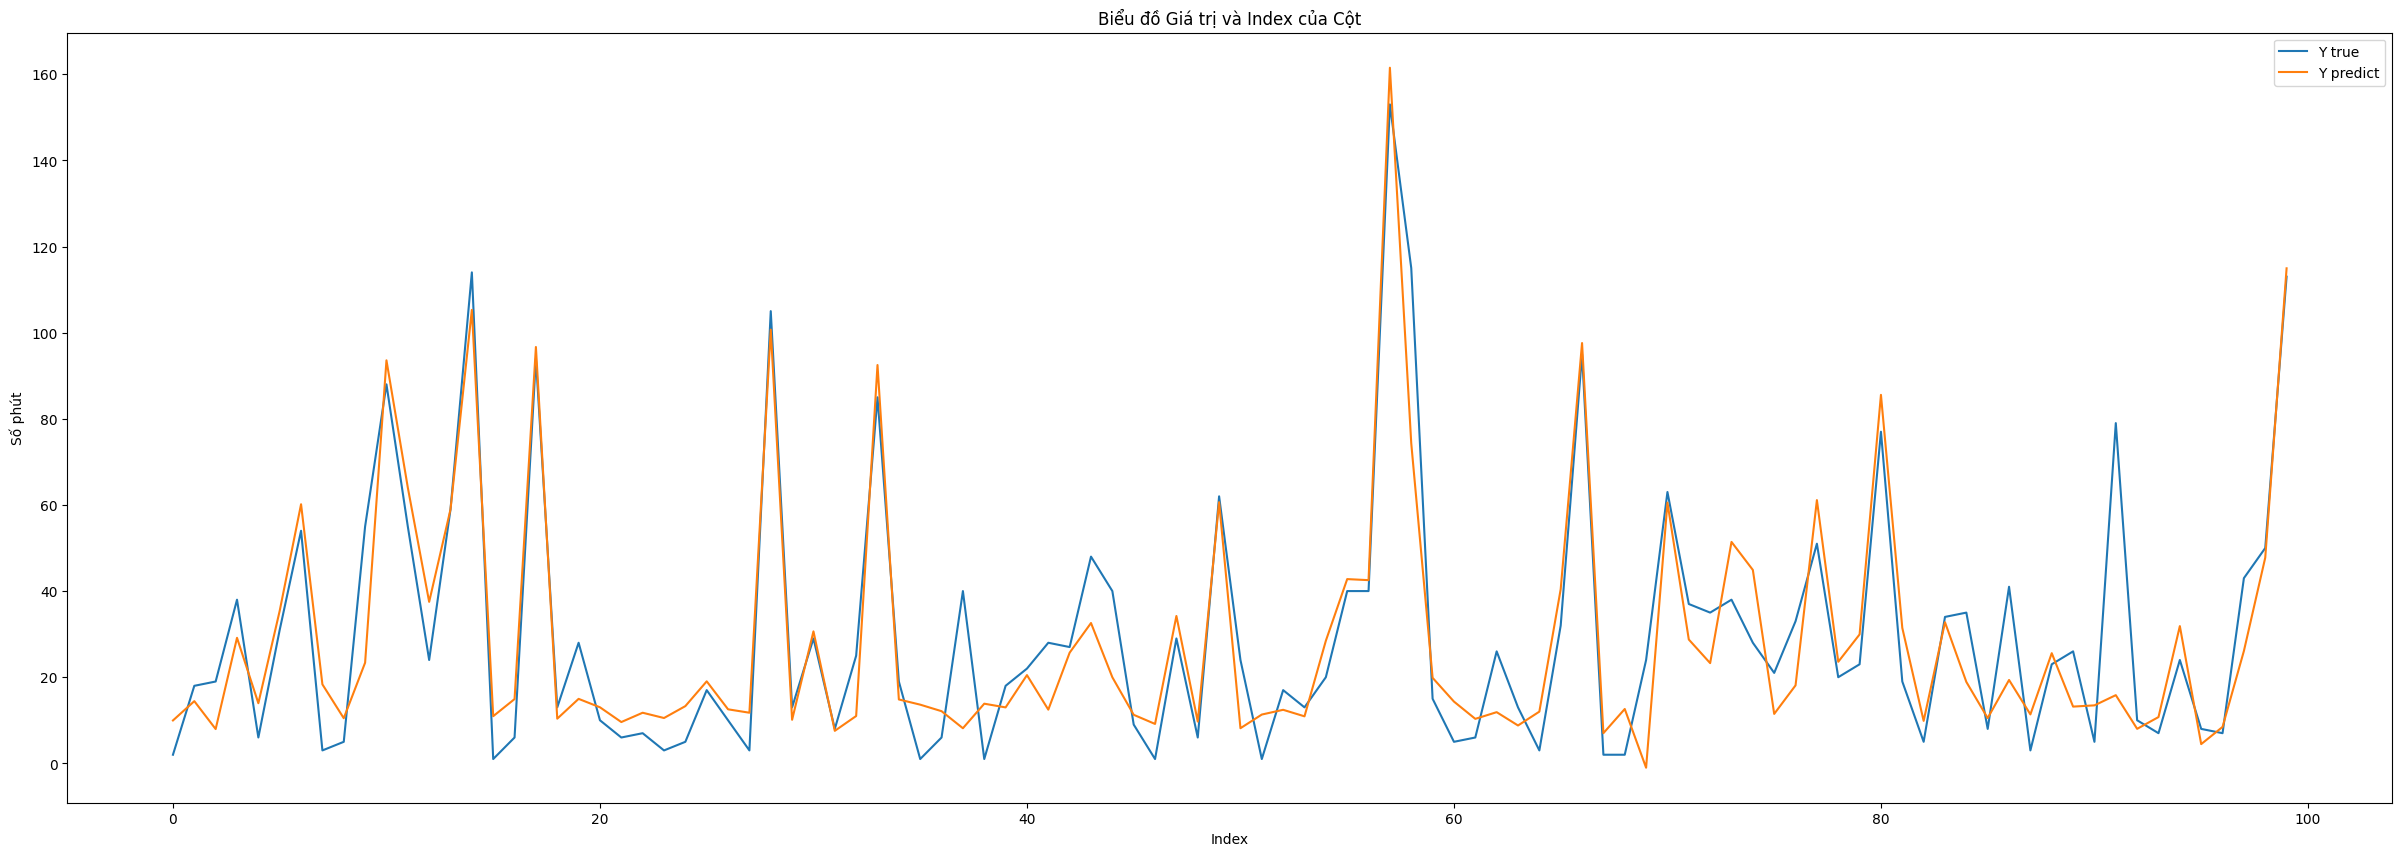

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

n = 100
df_sample_all = df_result.sample(n)
df_sample_all = pd.DataFrame(df_sample_all)
df_sample_all.reset_index(drop=True, inplace=True)

# Biểu đồ giá trị và index với màu xanh lá cây
plt.figure(figsize=(30, 10))
plt.plot(df_sample_all.index, df_sample_all["Y_test"], linestyle='-', label='Y true')
plt.plot(df_sample_all.index, df_sample_all["Y_pred_test_XGBoost"], linestyle='-', label='Y predict')

plt.xlabel('Index')
plt.ylabel('Số phút')
plt.title('Biểu đồ Giá trị và Index của Cột')

plt.legend()
plt.show()